<a href="https://colab.research.google.com/github/Patrick-Setubal/data_science_analytics/blob/main/alura_curso/formacao_data_science/SeriesTemporais/SeriesTemporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alucar - Analisando as Vendas


In [ ]:
# Importações
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 

In [ ]:
# Obtendo Dados
alucar = pd.read_csv("https://raw.githubusercontent.com/Patrick-Setubal/data_science_analytics/main/alura_curso/formacao_data_science/SeriesTemporais/alucar.csv")

# Verificar tamanho do Dataset, Quantidade de Nulos, Type das colunas  
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [ ]:
# Transformando a coluna "mes" que esta no formato object em datatime
alucar.mes = pd.to_datetime(alucar.mes)
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


## Graficos separados

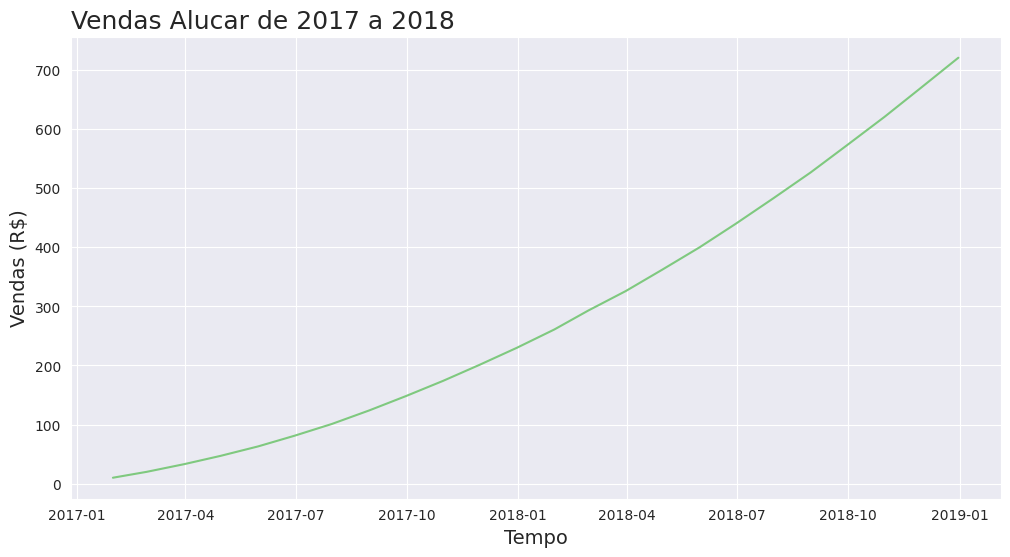

In [ ]:
# Configurar Aparencia do grafico
sns.set_palette('Accent')
sns.set_style('darkgrid')

# Exibir grafico de linha 
ax = sns.lineplot(x='mes' ,y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title("Vendas Alucar de 2017 a 2018", loc='left', fontsize=18 )
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

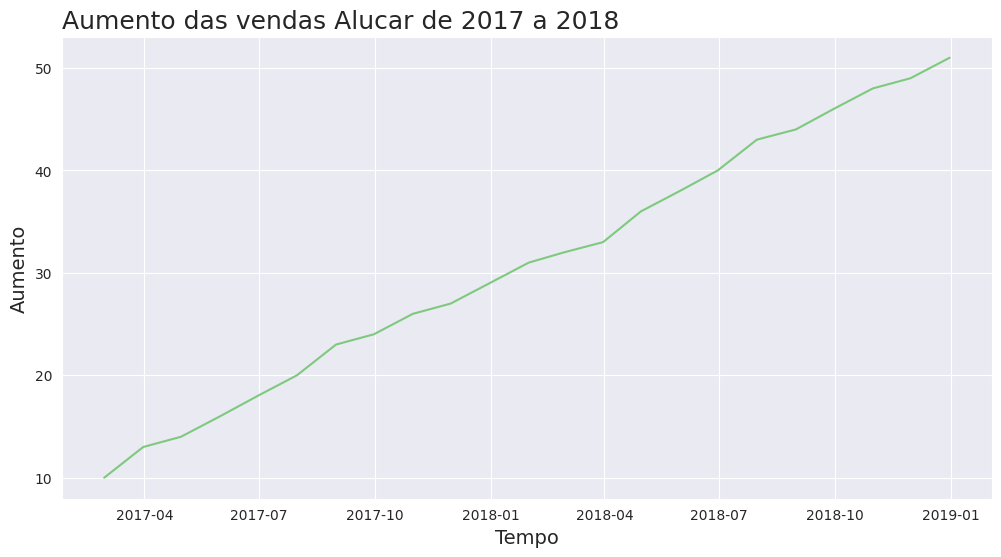

In [ ]:
# plotar o grafico com o aumento das vendas
alucar['aumento'] = alucar.vendas.diff()

# Exibir grafico de linha 
ax = sns.lineplot(x='mes' ,y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title("Aumento das vendas Alucar de 2017 a 2018", loc='left', fontsize=18 )
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

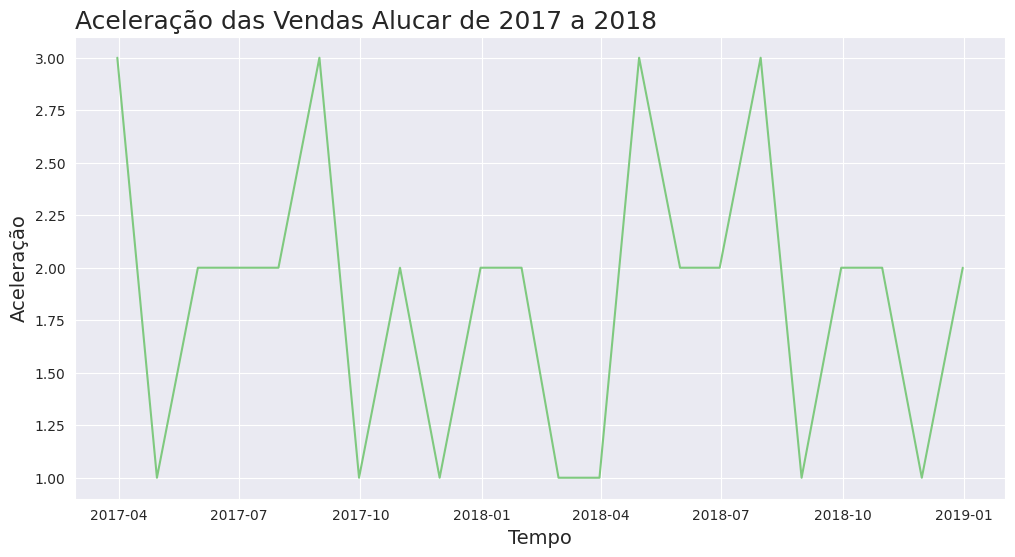

In [ ]:
# Definir aceleração
alucar['aceleracao'] = alucar.aumento.diff()

# Exibir grafico de linha 
ax = sns.lineplot(x='mes' ,y='aceleracao', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title("Aceleração das Vendas Alucar de 2017 a 2018", loc='left', fontsize=18 )
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aceleração', fontsize=14)
ax = ax

## Graficos Unidos 

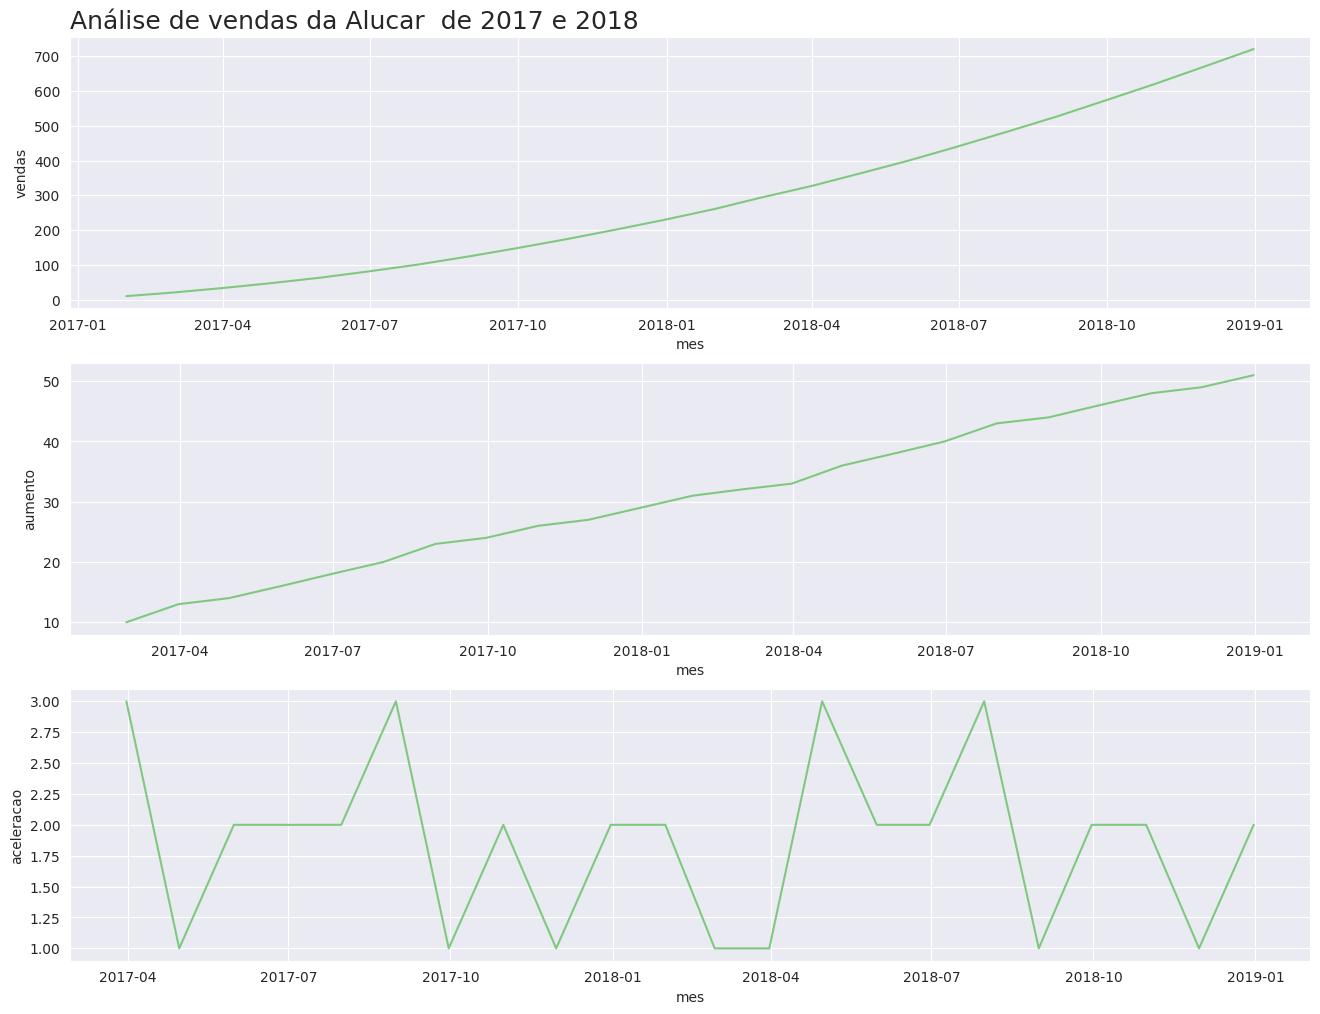

In [ ]:
# Plotar 3 Graficos juntos
# Grafico de vendas
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title("Análise de vendas da Alucar  de 2017 e 2018", fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)

# Grafico do aumento de vendas
plt.subplot(3,1,2)
ax = sns.lineplot(x='mes', y='aumento', data=alucar)

# Grafico da aceleração das vendas
plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='aceleracao', data=alucar)

## Correlação

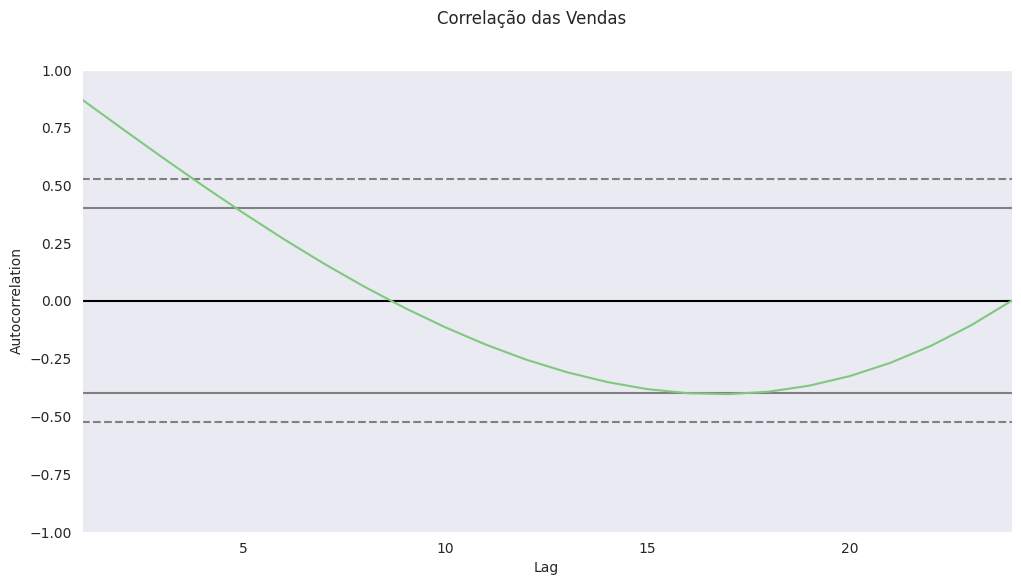

In [ ]:
from pandas.plotting import autocorrelation_plot
# Plotar grafico de corelação temporal das vendas 
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas')
autocorrelation_plot(alucar.vendas)
ax = ax

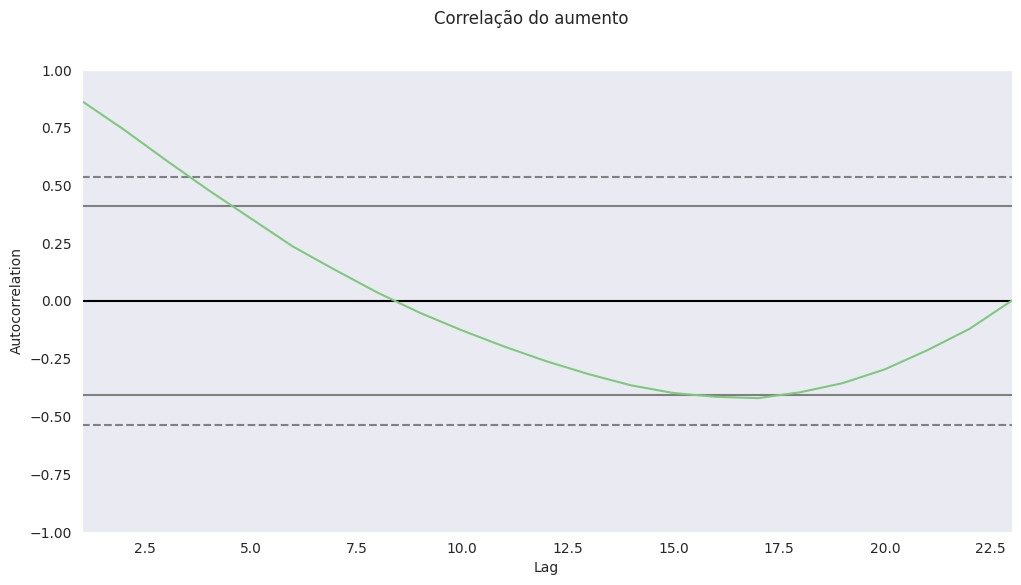

In [ ]:
# Plotar grafico de corelação temporal do Aumento 
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento')
autocorrelation_plot(alucar.aumento[1:])
ax = ax

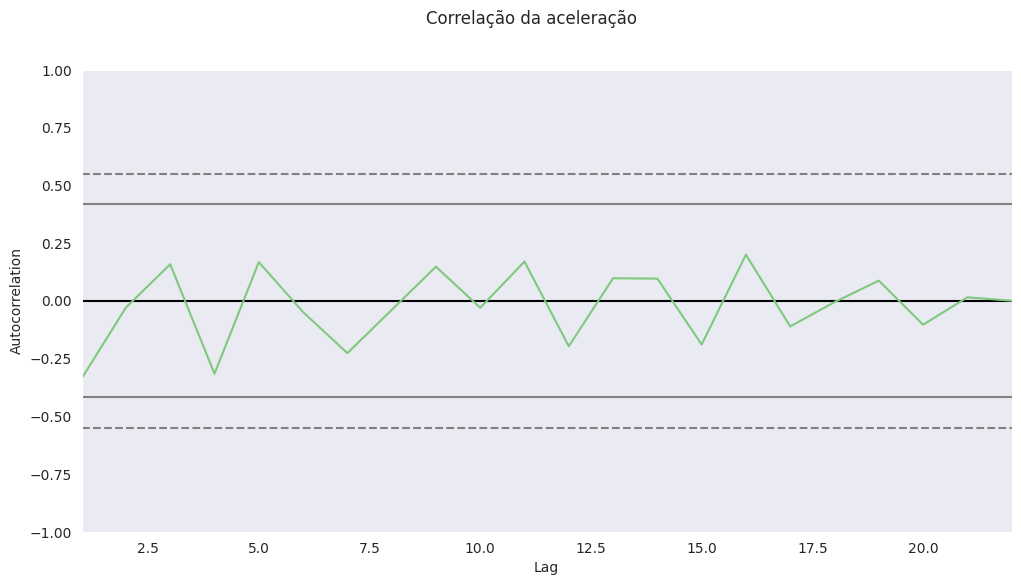

In [ ]:
# Plotar grafico de corelação temporal da Aceleração
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração')
autocorrelation_plot(alucar.aceleracao[2:])
ax = ax

# Alucar - Analisando Assinantes da Newsletter

In [ ]:
# Importar dados
assinantes = pd.read_csv('https://raw.githubusercontent.com/Patrick-Setubal/data_science_analytics/main/alura_curso/formacao_data_science/SeriesTemporais/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [ ]:
# Verificar formato dos dados, tamanho e quantidade de Null's
assinantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mes         24 non-null     object
 1   assinantes  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [ ]:
# Tratar formato da coluna "mes"
assinantes.mes = pd.to_datetime(assinantes.mes)

In [ ]:
# Criar coluna do aumento de assinantes (levando em conta que ja esta ordenado)
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


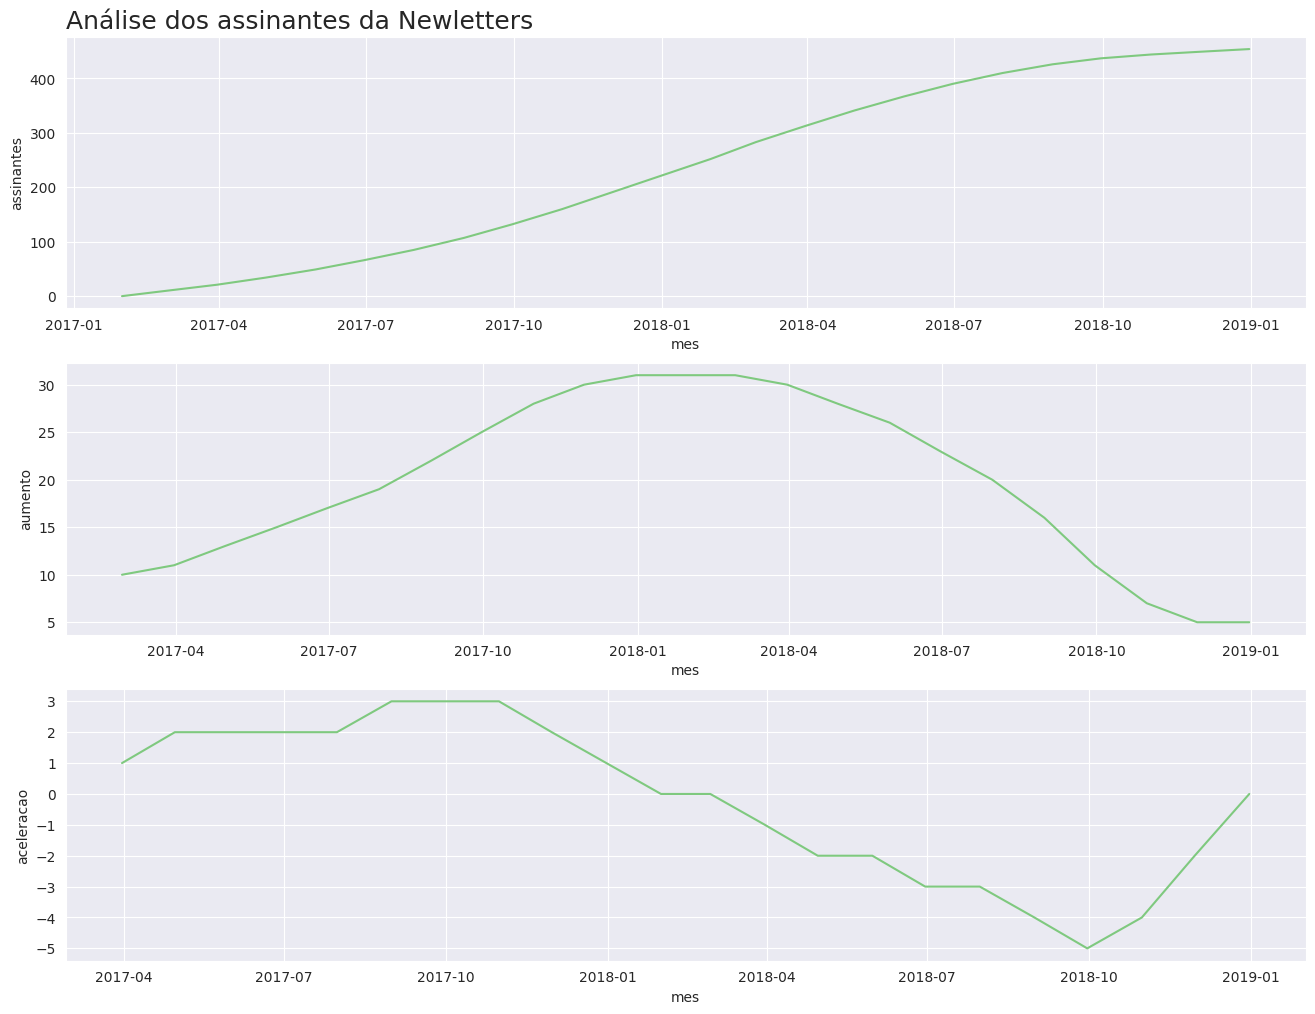

In [ ]:
# Plotar 3 Graficos juntos Analisando a coluna Assinatura, Aumento e Aceleração
# Grafico de vendas
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title("Análise dos assinantes da Newletters", fontsize=18, loc='left')
sns.lineplot(x='mes', y='assinantes', data=assinantes)

# Grafico do aumento de vendas
plt.subplot(3,1,2)
ax = sns.lineplot(x='mes', y='aumento', data=assinantes)

# Grafico da aceleração das vendas
plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='aceleracao', data=assinantes)

# Chocolura - Analisando as Vendas

In [ ]:
# Importando Dados
chocolura = pd.read_csv('https://raw.githubusercontent.com/Patrick-Setubal/data_science_analytics/main/alura_curso/formacao_data_science/SeriesTemporais/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [ ]:
# Verificar, missings, quantidade de linha, type das colunas
chocolura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [ ]:
# Converter mes para datetime
chocolura.mes = pd.to_datetime(chocolura.mes)
chocolura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


In [ ]:
chocolura['aumento'] = chocolura.vendas.diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


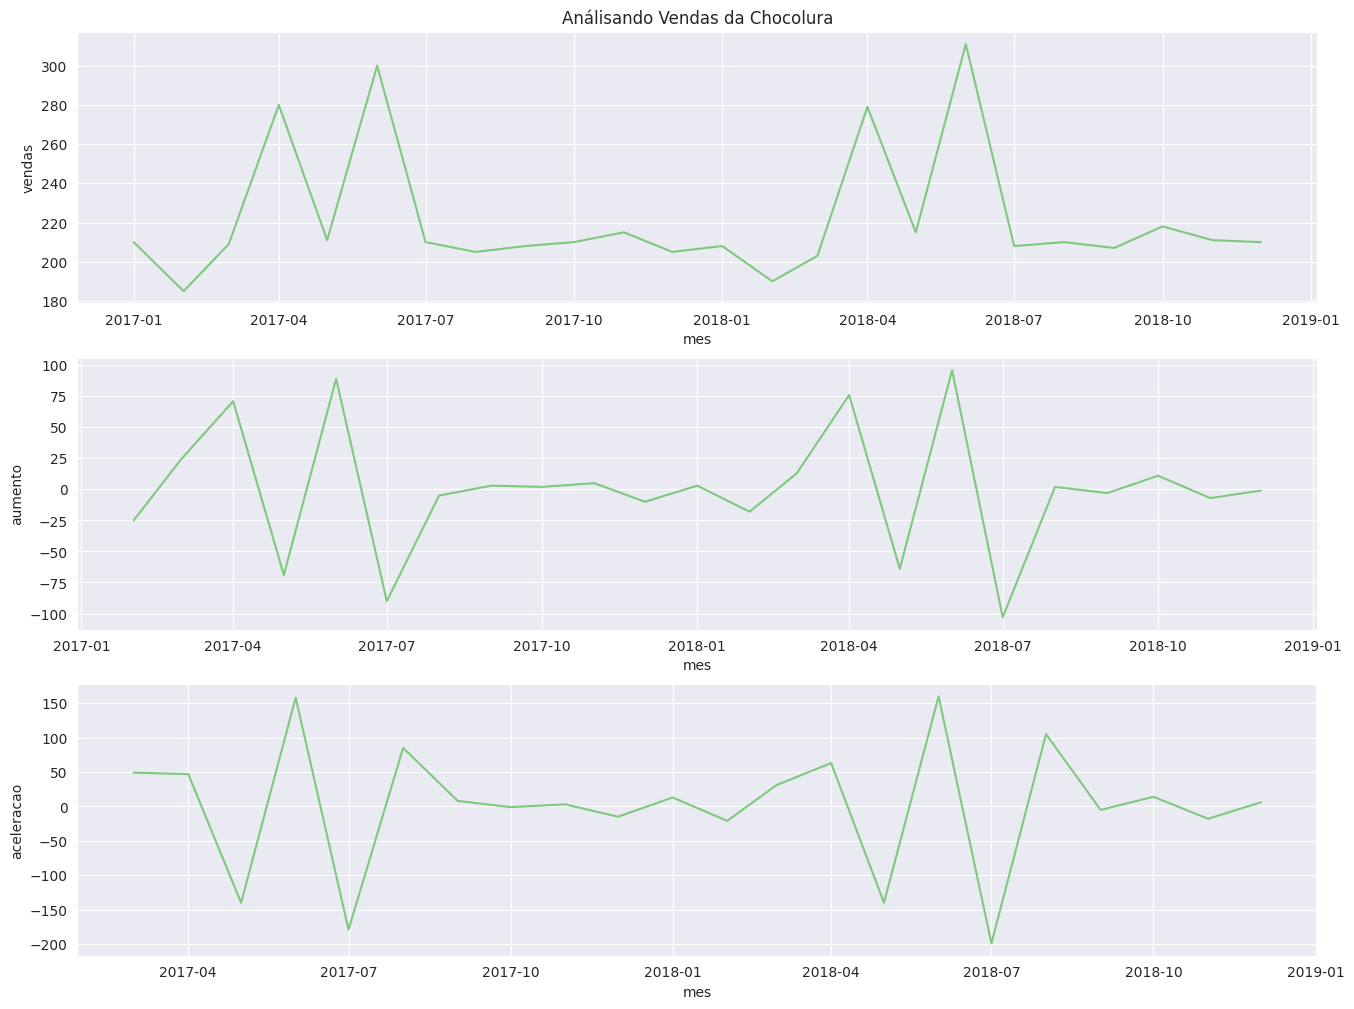

In [ ]:
# Plotar graficos analisando vendas, seu aumento e sua aceleração
# Configurando Graficos
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title("Análisando Vendas da Chocolura")
# Criar grafico de vendas
plt.subplot(3,1,1)
ax = sns.lineplot(x='mes', y='vendas', data=chocolura)

# aumento
plt.subplot(3,1,2)
ax = sns.lineplot(x='mes', y='aumento', data=chocolura)

# aceleracao
plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='aceleracao', data=chocolura)



Existe uma sazonalidade (padrão que ocorre em um determinado periodo)

É possível associar o aumento de vendas no mes 4 ao feriado da pascoa e o aumento no mes 6 ao dia dos namorados


## Chocolura - Vendas diárias (Outobro e Novembro)

In [ ]:
# Importando dados e analisando
vendas_por_dia = pd.read_csv('https://raw.githubusercontent.com/Patrick-Setubal/data_science_analytics/main/alura_curso/formacao_data_science/SeriesTemporais/vendas_por_dia.csv')
display(vendas_por_dia.head())
vendas_por_dia.info()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dia     61 non-null     object
 1   vendas  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dia     61 non-null     datetime64[ns]
 1   vendas  61 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


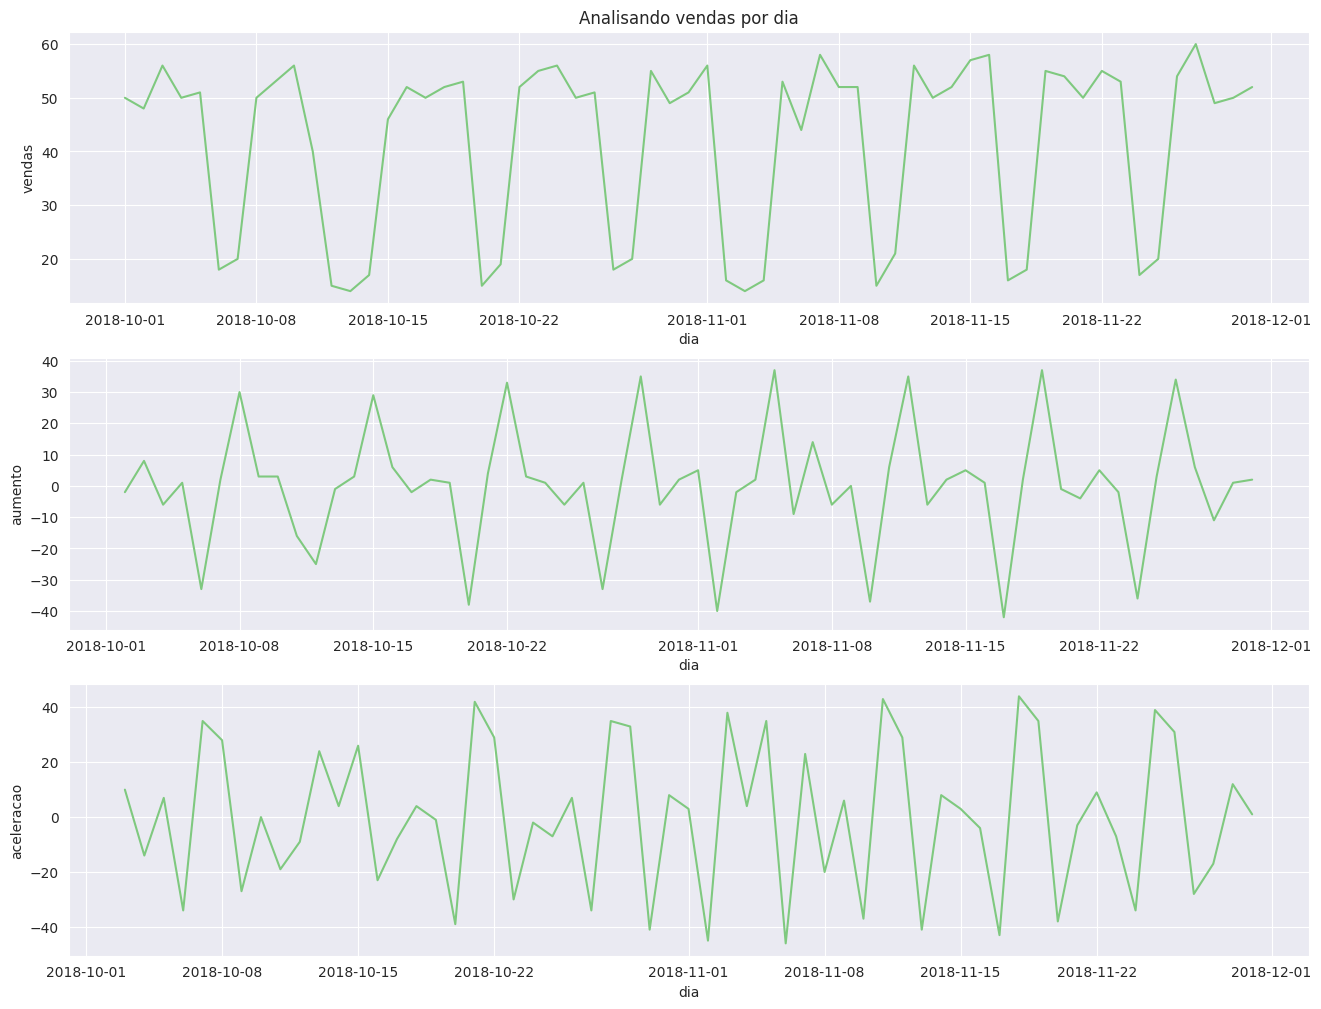

In [ ]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()

# Plotar graficos analisando vendas, seu aumento e sua aceleração
# Configurando Graficos
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title("Analisando vendas por dia")

# Criar grafico de vendas
plt.subplot(3,1,1)
ax = sns.lineplot(x='dia', y='vendas', data=vendas_por_dia)

# aumento
plt.subplot(3,1,2)
ax = sns.lineplot(x='dia', y='aumento', data=vendas_por_dia)

# aceleracao
plt.subplot(3,1,3)
ax = sns.lineplot(x='dia', y='aceleracao', data=vendas_por_dia)

### Analisando a sazonalidade

In [ ]:
# Descobrir dias da semana
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.weekday
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,0
1,2018-10-02,48,-2.0,NaN,1
2,2018-10-03,56,8.0,10.0,2
3,2018-10-04,50,-6.0,-14.0,3
4,2018-10-05,51,1.0,7.0,4


In [ ]:
# Dando nome da semana aos indices 
dias_semana = {
    0: 'Segunda-feira',
    1: 'Terça-feira',
    2: 'Quarta-feira',
    3: 'Quinta-feira',
    4: 'Sexta-feira',
    5: 'Sábado',
    6: 'Domingo'
}
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.weekday.map(dias_semana)
vendas_por_dia.head()


,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda-feira
1,2018-10-02,48,-2.0,NaN,Terça-feira
2,2018-10-03,56,8.0,10.0,Quarta-feira
3,2018-10-04,50,-6.0,-14.0,Quinta-feira
4,2018-10-05,51,1.0,7.0,Sexta-feira


### Corelação dos dias da semana

In [ ]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas','aumento','aceleracao']].mean().round()
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta-feira,53.0,1.0,2.0
Quinta-feira,51.0,-2.0,-3.0
Segunda-feira,52.0,34.0,31.0
Sexta-feira,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça-feira,52.0,-1.0,-34.0


O motivo da sazonalidade são os dias da semana onde é possivel analisar que nos finais de semana a uma forte queda das vendas.

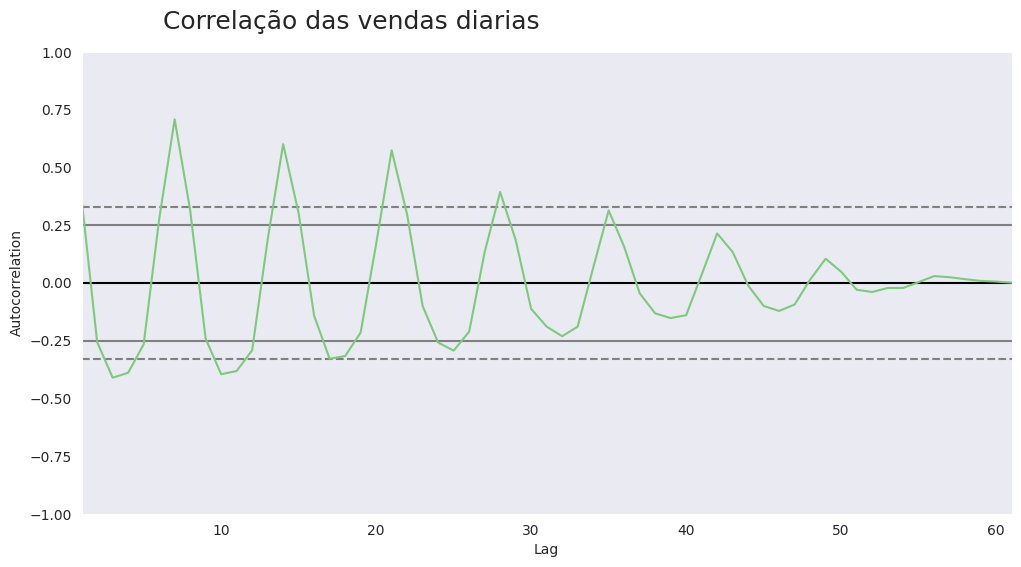

In [ ]:
# Correlação das Vendas diarias 
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diarias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas']); ax = ax


Como existe uma forte correlação semanal no sap 7 é onde se tem o pico de correlação

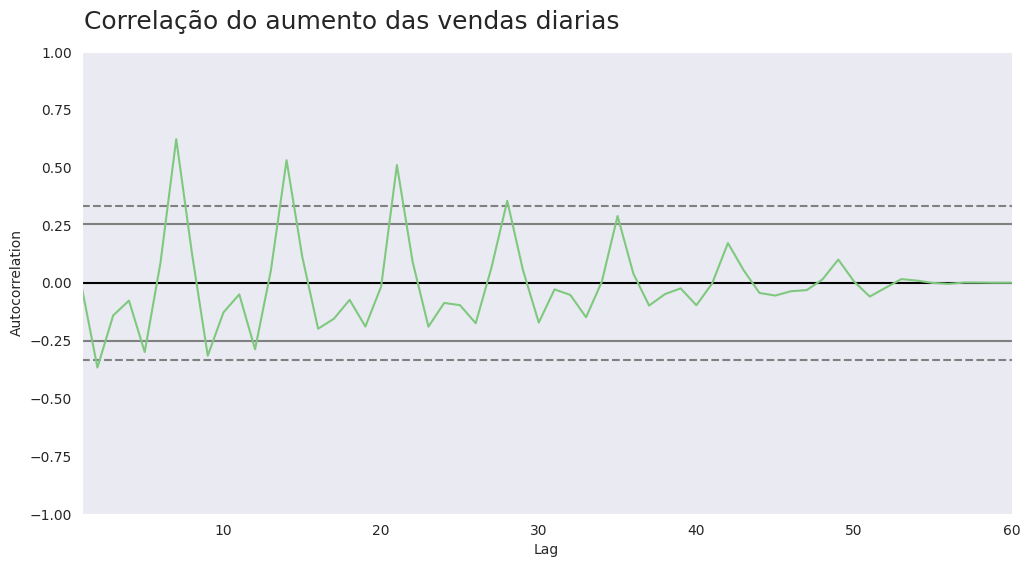

In [ ]:
# Correlação das Vendas diarias do Aumento 
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diarias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:]); ax = ax

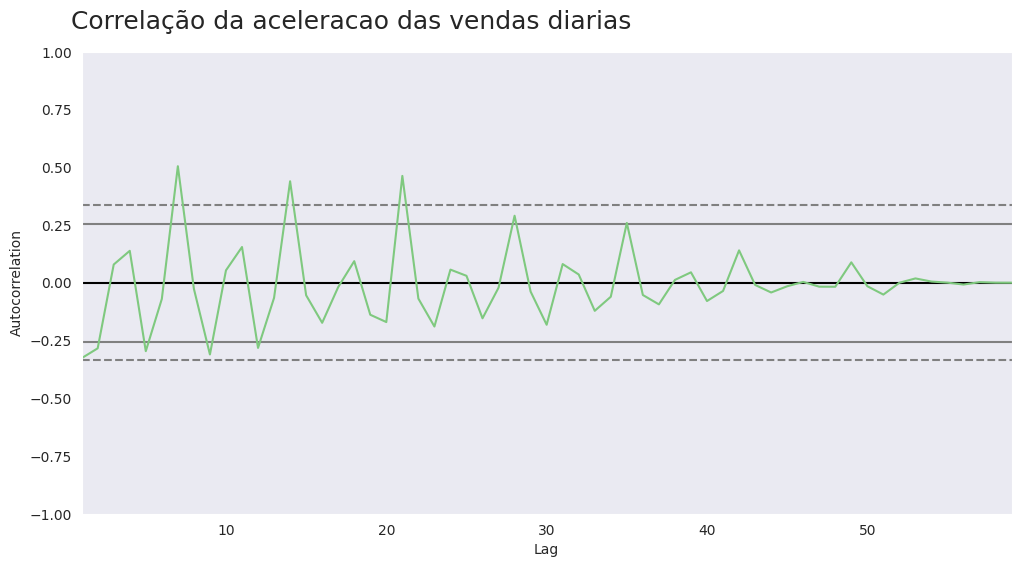

In [ ]:
# Correlação das Vendas diarias da Aceleração 
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleracao das vendas diarias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:]); ax = ax